# Lavorare sulle sequenze

Il fatto di lavorare su sequenze vuol dire sviluppare modelli capaci di processare sequenze concentrandosi sull' `input` come una lista di `feature vectors` $x_1, ..., x_T$ dove ogni vettore feature $x_t$ è indicizzato da un time step $t \in \mathbb{Z}^+$ che rientra in $\mathbb{R}^d$



Alcuni dataset consistono in una **singola grande sequenza**. Per esempio i dati di un sensore per il cambiamento climatico, dunque in quel caso creiamo il training dataset facendo un sampling randomico sulle sottosequenze di una lunghezza prefissata.

Altri dati invece arrivano come collezione di sequenze. Ad esempio possiamo considerare:
  - una collezione di documenti, ognuna rappresentata con la propria sequenza di parole, dove ognuna ha la sua lunghezza $T_i$

Assumiamo che gli input siano estratti in maniera indipendente sotto la stessa distribuzione di probabilità $P(X)$.

Però non si può assumere che i dati arrivino in maniera indipendente ad ogni time step, poichè magari nell'esempio di prima le parole tenderanno ad apparire in base anche ai documenti precedenti.

Questo accade anche quando utilizziamo i compilatori automatici di parole durante la scrittura di una mail. Si possono predirre le parole successive (anche se a volte in maniera imprecisa ma pur sempre meglio di indovinarle in maniera randomica) dato del testo come prefisso.

Quindi a volte vogliamo predirre un target fisso $y$ data una struttura sequenziale iniziale come input (sentiment classification su una recensione di un film).

A volte invece vogliamo predirre una struttura sequenziale come output $y_1, ..., y_T$ dato un input fisso (image captioning).

Oppure possiamo avere **sequence to sequence task** che si suddividono in:
- *aligned*: quando l'input ad ogni time-step è allineato con il corrispondente target (part of speech tagging)
- *unaligned*: quando l'input e il target ad ogni time step non è allineato come nel caso del machine translation dall'inglese al francese.




# Autoregressive Models

Partiamo dal classico esempio. Siamo un trader che vuole fare degli investimenti a breve termine sui dati del FTSE 100 index. L'idea è quella di decidere in maniera strategica se entrare nell'index o uscire in base all'andamento del valore dell'azione. Le features che si hanno a disposizione sono solo i valori dell'azione ad ogni time step. Quindi nessuna altra feature come news,financial reporting data etc.

Quindi il trader è interessato nel conoscere la distribuzione di probabilità:
$$P(x_t | x_{t-1}, ... , x_1)$$

Il trader decide di accontentarsi anche solamente di alcune statistiche della distribuzione come l'expected value e la varianza.
$$\mathbb{E}(x_t | x_{t-1}, ... , x_1)$$

Quello che possiamo dire che anche se abbiamo una lunga sequenza $x_{t-1}, ..., x_1$ non è detto che sia necessario guardarla tutta per predirre il futuro, dunque possiamo inserire una condizione di una finestra di lunghezza $\tau$ e quindi utilizzare solo le osservazioni $x_{t-1}, ..., x_{t-\tau}$. Il vantaggio è che adesso sappiamo che il numero degli argomenti è sempre lo stesso , almeno $t > \tau$.

Questo consente di utilizzare alcuni linear model o deep network che richiedono un vettore di lunghezza fissa come input.

Secondo aspetto è quello di svilupaare un modello che mantiene alcuni riassunti $h_t$ delle osservazioni passate, ed aggiornare $h_t$ in corrispondenza dell'aggiunta della predizione $\hat{x}_t$. Questo porta i modelli non solo a stimare $x_t$ dato $\hat{x}_t = P(x_t | h_t)$ ma anche $h_t = g(h_{t-1}, x_{t-1})$. Visto che $h_t$ non viene mai osservato, questi modelli sono anche chiamati *latent autoregressive models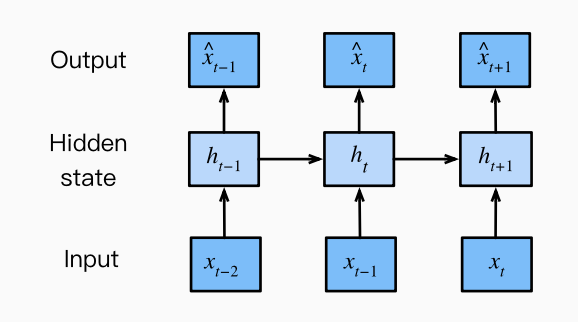*

Per costruire i dati di addestramento a partire dai dati storici, in genere si creano esempi campionando le finestre in modo casuale. In generale, non ci aspettiamo che il tempo si fermi. Tuttavia, spesso si assume che, mentre i valori specifici di $x_t$ possono cambiare, la dinamica secondo la quale ogni osservazione successiva viene generata in base alle osservazioni precedenti non cambia. Gli statistici chiamano **stazionarie** le dinamiche che non cambiano.

# Sequence Models

Qualche volta, specialmente quando si parla di linguaggio, si vuole stimare la probabilità congiunta di un intera sequenza. Questo è un compito comune quando si parla di sequenze composte da un numero discreto di *tokens* come le parole.

Questi modelli vengono chiamati **sequence models** mentre se si ha a che fare con il linguaggio verrano chiamati **language models**.

Si può ricondurre il problema del language model come un problema di auoregressione decompoennto la densità congiunta della sequenza $p(x_1, .., x_T) $ con la regola della chain rule della probabilità:

$$P(x_1, ..., x_T) = P(x_1) \prod_{t = 2}^{T} P(x_t | x_{t-1}, ... , x_1)$$

Se parliamo di segnali come parole, il modello autoregressivo è un classificatore di probabilità, ovvero da in output una distribuzione totale di probabilità sul vocabolario, ovvero su quale parola arriverà dopo.

## Markov Models

Come anticipato precedentemente, se decidiamo di prendere non tutti i dati ma fino a $\tau$ senza perdere potenza predittiva, allora la sequenza soddisfa la *condizione di Markov*, ovveero che il futuro è condizionatamente indipendente dal passato, data la storia recente.

Qunado $\tau = 1$ diciamo che i dati sono caratterizzati da *first order Markov model* mentre quando $\tau = k$ allora i dati sono caratterizzat da $k^{th}$-order Markov model.

Nel primo caso la fattorizzazione della nostra probabilità congiunta diventa un prodotto delle probabilità di ogni parola data la parola precedente:
$$P(x_1, ..., x_T) = P(x_1) \prod_{t = 2}^{T} P(x_t | x_{t-1})$$


# Training
Torniamo all'esempio di prima generando dati sintetici

In [2]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfull

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

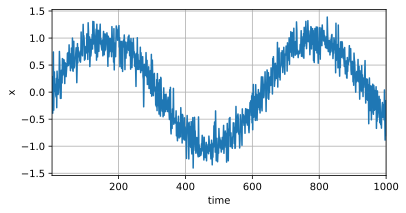

In [2]:
class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T + 1, dtype=torch.float32)
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2

data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [3]:
@d2l.add_to_class(Data)
def get_dataloader(self, train):
    features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]
    self.features = torch.stack(features, 1)
    self.labels = self.x[self.tau:].reshape((-1, 1))
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

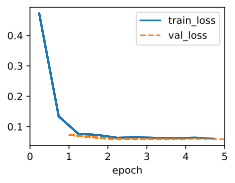

In [4]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

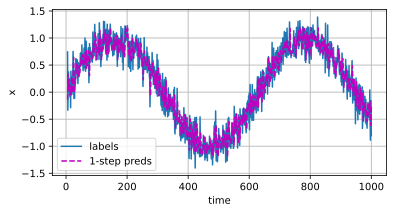

In [5]:
onestep_preds = model(data.features).detach().numpy()
d2l.plot(data.time[data.tau:], [data.labels, onestep_preds], 'time', 'x',
         legend=['labels', '1-step preds'], figsize=(6, 3))

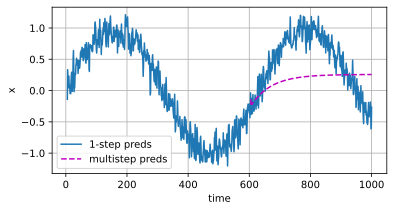

In [6]:
multistep_preds = torch.zeros(data.T)
multistep_preds[:] = data.x
for i in range(data.num_train + data.tau, data.T):
    multistep_preds[i] = model(
        multistep_preds[i - data.tau:i].reshape((1, -1)))
multistep_preds = multistep_preds.detach().numpy()

d2l.plot([data.time[data.tau:], data.time[data.num_train+data.tau:]],
         [onestep_preds, multistep_preds[data.num_train+data.tau:]], 'time',
         'x', legend=['1-step preds', 'multistep preds'], figsize=(6, 3))

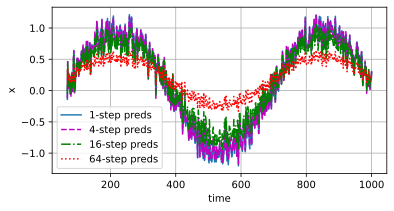

In [8]:
def k_step_pred(k):
    features = []
    for i in range(data.tau):
        features.append(data.x[i : i+data.T-data.tau-k+1])
    # The (i+tau)-th element stores the (i+1)-step-ahead predictions
    for i in range(k):
        preds = model(torch.stack(features[i : i+data.tau], 1))
        features.append(preds.reshape(-1))
    return features[data.tau:]

steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k - 1].detach().numpy() for k in steps], 'time', 'x',
         legend=[f'{k}-step preds' for k in steps], figsize=(6, 3))

# Recurrent Neural Networks

Se vogliamo incorporare il possibile effetto dei token prima del passo temporale $t- (n - 1)$ su $x_t$ , dobbiamo aumentare $n$ . Tuttavia, anche il numero di parametri del modello aumenterebbe esponenzialmente con esso, poiché dobbiamo memorizzare $|\mathcal{V}^n|$ numeri per un insieme di vocaboli $\mathcal{V}$. Quindi invece di modellare $P(x_t | x_{t-1}, ..., x_{t-n+1})$ è meglio utilizzare un *latent variable model*.

$$P(x_t | x_{t-1}, ..., x_{1}) \approx P(x_t \mid h_{t-1})$$

dove $h_{t-1}$ è un *hidden state* che immagazina la sequenza di informazioni al time step $t-1$.
In generale , l'hiddent stat , a qualsiasi time step t, può essere computato in base all'input corrente $x_t$ e al precedente hidden state $h_{t-1}$:
$$ h_t = f(x_t, h_{t-1}) $$

Quindi per una funzione sufficientemente potente come $f$ , il latent variable model non è un apporssimazione. Dopotutto $h_t$ immagazzina semplicemente tutti i dati che ha osservato fino a quel momento. Inoltre può portare a costi eccessivi sia in termini di computazione che di storage.

## Definizione del concetto di Hidden Layers e Hidden States
L'idea è che, l' **hidden layer** è un livello che è nascosto dalla vista sul percorso di input e di output.

L' ** hidden states** rappresenta un input ad un certo step, e si può computare solo guardando i dati ai precedenti time step.

RNNs sono **neural network con hidden states**.


# RNN from scratch

Input di minibath che chiamamo $\mathbf{X}_t \in \mathbb{R}^{n \times d}$ al time step $t$.
In altre parole, per un minibatch di $n$ esempi di sequenze, ogni riga di $\mathbf{X}_t$ corrisponde ad un esempio al time step t di quella sequenza.

$\mathbf{H}_t \in \mathbb{R}^{n \times h}$ corrisponde all'hidden layer output del time step t. Quindi salviamo l'hidden layer output $\mathbf{H}_{t-1}$ dal precedente time step e introduciamo un nuovo parametro di peso $\mathbf{W}_{\textrm{hh}} \in \mathbb{R}^{h \times h}$ che descrive come utilizzare l'hiddent layer output del time step precedente  nel time step corrente.

Infatti il calcolo dell'output dell'hidden layer del time step corrente è determinato dall'input del time step corrente insieme all'output dell'hidden state al rime tep precedente.
$$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}_{\textrm{xh}} + \mathbf{H}_{t-1} \mathbf{W}_{\textrm{hh}}  + \mathbf{b}_\textrm{h})$$
dove:
- $\phi$ è la funzione di attivazione
- $\mathbf{W}_{\textrm{xh}} \in \mathbb{R}^{d \times h}$ è il parametro pesi
- $\mathbf{b}_\textrm{h}$ è il parametro bias

Per il time step $t$ l'output prodotto dall'output layer è simile a quella delle MLP:
$$\mathbf{O}_t = \mathbf{H}_t \mathbf{W}_{\textrm{hq}} + \mathbf{b}_\textrm{q}$$


In [10]:
import math
from torch import nn
from torch.nn import functional as F

In [9]:
class RNNScratch(d2l.Module):  #@save
    """The RNN model implemented from scratch."""
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W_xh = nn.Parameter(
            torch.randn(num_inputs, num_hiddens) * sigma)
        self.W_hh = nn.Parameter(
            torch.randn(num_hiddens, num_hiddens) * sigma)
        self.b_h = nn.Parameter(torch.zeros(num_hiddens))

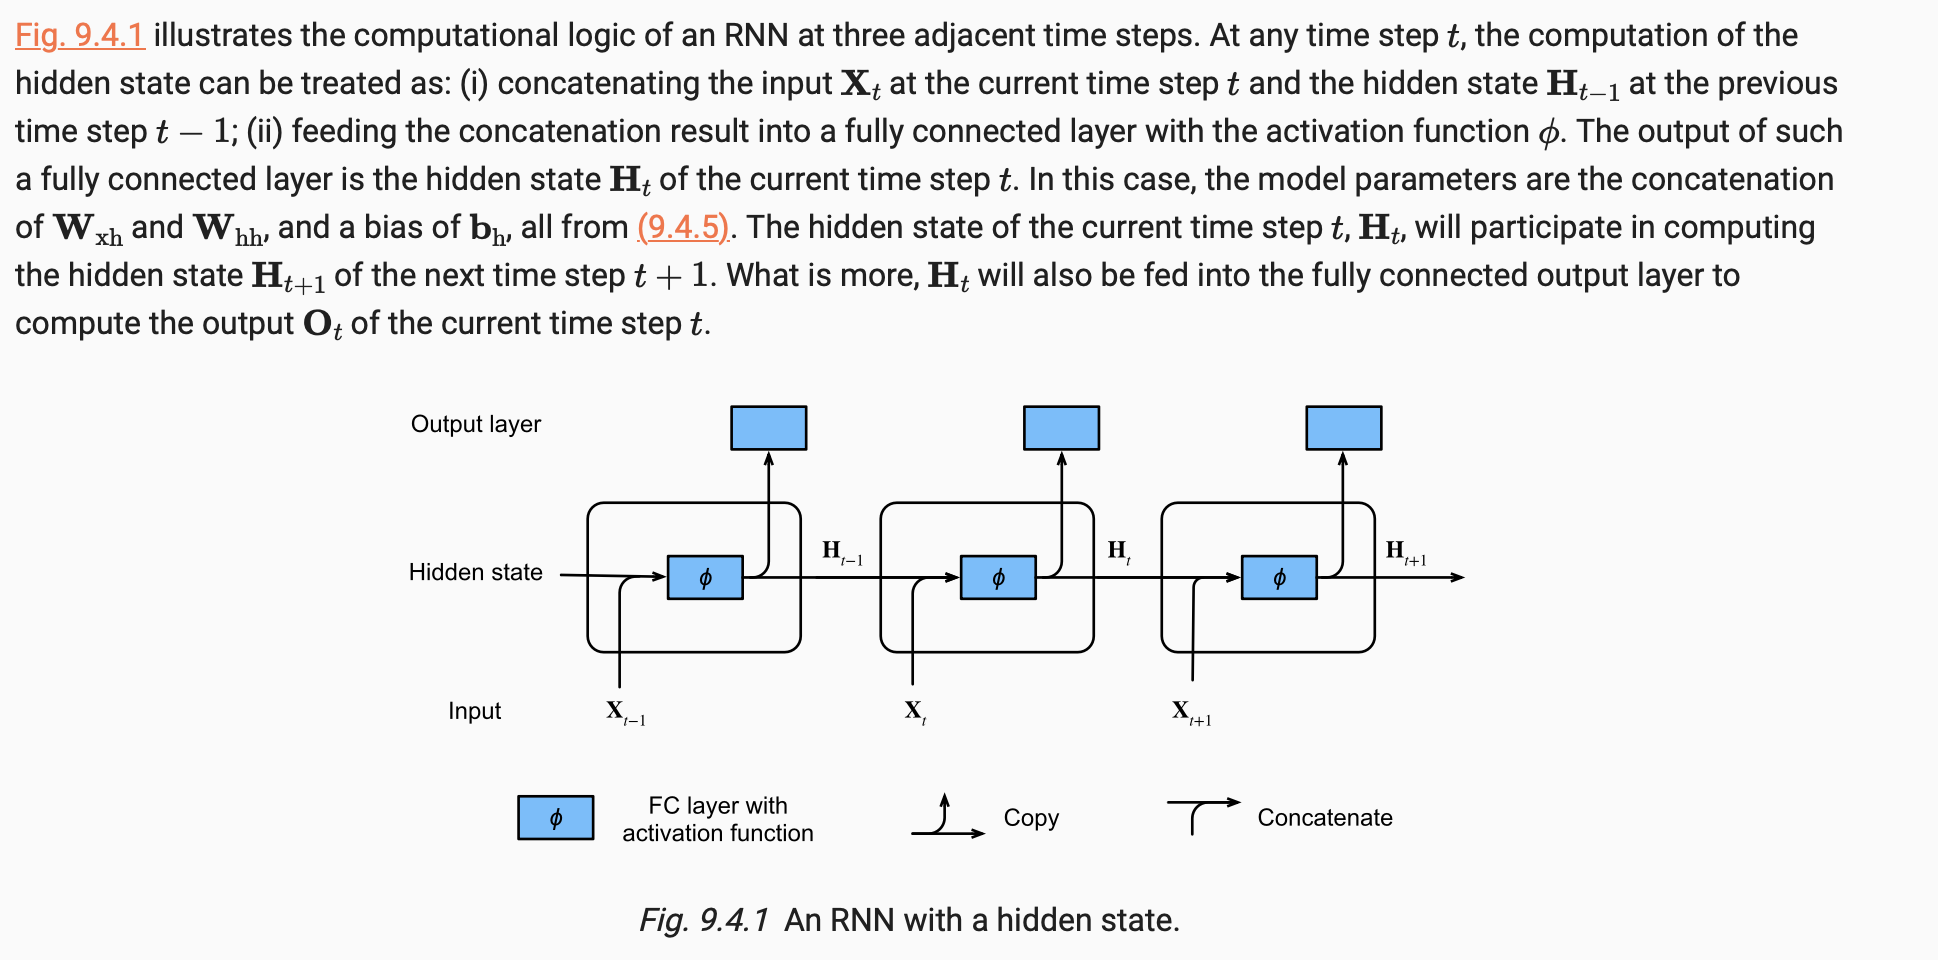

In [11]:
@d2l.add_to_class(RNNScratch)  #@save
def forward(self, inputs, state=None):
    if state is None:
        # Initial state with shape: (batch_size, num_hiddens)
        state = torch.zeros((inputs.shape[1], self.num_hiddens),
                          device=inputs.device)
    else:
        state, = state
    outputs = []
    for X in inputs:  # Shape of inputs: (num_steps, batch_size, num_inputs)
        state = torch.tanh(torch.matmul(X, self.W_xh) +
                         torch.matmul(state, self.W_hh) + self.b_h)
        outputs.append(state)
    return outputs, state

In [12]:
batch_size, num_inputs, num_hiddens, num_steps = 2, 16, 32, 100
rnn = RNNScratch(num_inputs, num_hiddens)
X = torch.ones((num_steps, batch_size, num_inputs))
outputs, state = rnn(X)

In [13]:
def check_len(a, n):  #@save
    """Check the length of a list."""
    assert len(a) == n, f'list\'s length {len(a)} != expected length {n}'

def check_shape(a, shape):  #@save
    """Check the shape of a tensor."""
    assert a.shape == shape, \
            f'tensor\'s shape {a.shape} != expected shape {shape}'

check_len(outputs, num_steps)
check_shape(outputs[0], (batch_size, num_hiddens))
check_shape(state, (batch_size, num_hiddens))